In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch
import torch.nn as nn

from world_model.networks.gpt2 import GPT2

In [4]:

# Function to create a model and return the number of parameters
def create_and_count_params(embedding_dim, nb_layers):
    model = GPT2(
        embedding_dim=embedding_dim,
        nb_layers=nb_layers,
        nb_heads=1, 
        vocabulary_size=1024, 
        nb_timesteps=1, 
        nb_tokens_per_timestep=1, 
        dropout_rate=0.15,
        bias=True)
    total_params = sum(p.numel() for p in model.parameters())
    return total_params

# Parameters for grid search
embedding_dim_list = [128, 256, 512, 768, 1024, 2048, 4096]
nb_layers_list = [2, 4, 8, 10, 12, 14, 16,20,24,32]

# Dictionary to store results
params_dict = {}

# Perform grid search
for embedding_dim in tqdm(embedding_dim_list):
    for nb_layers in nb_layers_list:
        key = (embedding_dim, nb_layers)
        params_dict[key] = create_and_count_params(embedding_dim, nb_layers)

  0%|          | 0/7 [00:00<?, ?it/s]

number of parameters: 0.53M
number of parameters: 0.92M
number of parameters: 1.72M
number of parameters: 2.11M
number of parameters: 2.51M
number of parameters: 2.91M
number of parameters: 3.30M
number of parameters: 4.10M
number of parameters: 4.89M
number of parameters: 6.48M
number of parameters: 1.84M
number of parameters: 3.42M
number of parameters: 6.58M
number of parameters: 8.16M
number of parameters: 9.74M
number of parameters: 11.32M
number of parameters: 12.90M
number of parameters: 16.06M
number of parameters: 19.22M
number of parameters: 25.53M
number of parameters: 6.83M
number of parameters: 13.13M
number of parameters: 25.74M
number of parameters: 32.05M
number of parameters: 38.35M
number of parameters: 44.66M
number of parameters: 50.96M
number of parameters: 63.57M
number of parameters: 76.18M
number of parameters: 101.40M
number of parameters: 14.96M
number of parameters: 29.14M
number of parameters: 57.49M
number of parameters: 71.67M
number of parameters: 85.84M


In [5]:
params_dict

{(128, 2): 528128,
 (128, 4): 924672,
 (128, 8): 1717760,
 (128, 10): 2114304,
 (128, 12): 2510848,
 (128, 14): 2907392,
 (128, 16): 3303936,
 (128, 20): 4097024,
 (128, 24): 4890112,
 (128, 32): 6476288,
 (256, 2): 1842688,
 (256, 4): 3422208,
 (256, 8): 6581248,
 (256, 10): 8160768,
 (256, 12): 9740288,
 (256, 14): 11319808,
 (256, 16): 12899328,
 (256, 20): 16058368,
 (256, 24): 19217408,
 (256, 32): 25535488,
 (512, 2): 6831104,
 (512, 4): 13135872,
 (512, 8): 25745408,
 (512, 10): 32050176,
 (512, 12): 38354944,
 (512, 14): 44659712,
 (512, 16): 50964480,
 (512, 20): 63574016,
 (512, 24): 76183552,
 (512, 32): 101402624,
 (768, 2): 14965248,
 (768, 4): 29140992,
 (768, 8): 57492480,
 (768, 10): 71668224,
 (768, 12): 85843968,
 (768, 14): 100019712,
 (768, 16): 114195456,
 (768, 20): 142546944,
 (768, 24): 170898432,
 (768, 32): 227601408,
 (1024, 2): 26245120,
 (1024, 4): 51437568,
 (1024, 8): 101822464,
 (1024, 10): 127014912,
 (1024, 12): 152207360,
 (1024, 14): 177399808,
 (102

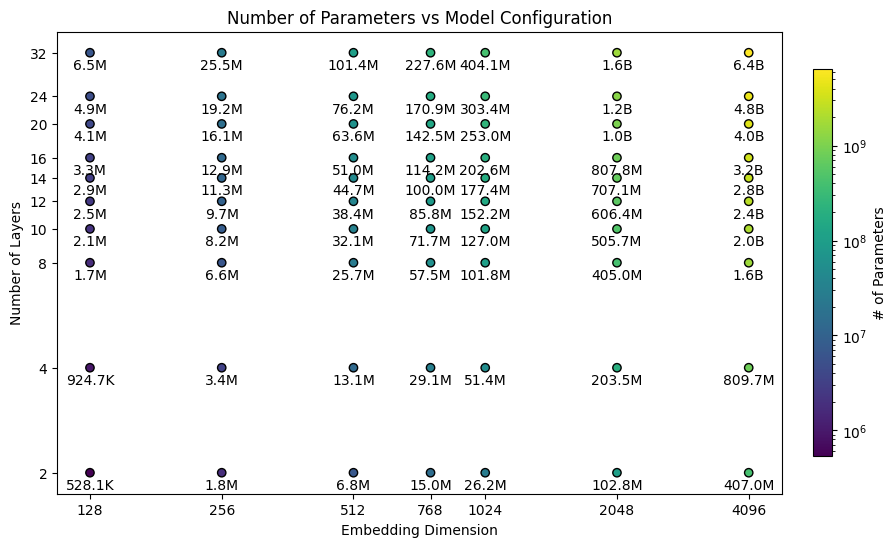

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import viridis
from matplotlib.ticker import ScalarFormatter, LogFormatter
import numpy as np

# Convert number to human-readable format
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return f'{num:.1f}{["", "K", "M", "B", "T"][magnitude]}'

# Prepare the data for plotting
embedding_dims, nb_layers = zip(*params_dict.keys())
params_counts = [params_dict[key] for key in params_dict.keys()]

# Normalize color map based on the parameter counts
norm = mcolors.LogNorm(vmin=min(params_counts), vmax=max(params_counts))
cmap = viridis

# Create a 2D scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create scatter plot
sc = ax.scatter(embedding_dims, nb_layers, c=params_counts, cmap=cmap, norm=norm, edgecolor='black')

# Annotate each point with the number of parameters in human-readable format
for (ed, nl), pc in zip(params_dict.keys(), params_counts):
    ax.annotate(human_format(pc), (ed, nl), textcoords="offset points", xytext=(0,-12), ha='center')

# Set the x-axis ticks to correspond to embedding_dims
ax.set_xscale('log', base=2)
ax.set_xticks(embedding_dim_list)
ax.get_xaxis().set_major_formatter(ScalarFormatter())

# Set the x-axis ticks to correspond to embedding_dims
ax.set_yscale('log', base=2)
ax.set_yticks(nb_layers_list)
ax.get_yaxis().set_major_formatter(ScalarFormatter())


# Set labels and title
ax.set_xlabel('Embedding Dimension')
ax.set_ylabel('Number of Layers')
ax.set_title('Number of Parameters vs Model Configuration')

# Create a colorbar with the color map on a log scale
cbar = fig.colorbar(sc, orientation='vertical', fraction=0.025, pad=0.04)
cbar.set_label('# of Parameters')

# Show the plot
plt.show()